In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from tqdm import tqdm

In [2]:
class BasicAgent:
    '''
    Базовый агент, от которого наследуются стратегии обучения
    '''
    # Наименование алгоритма
    ALGO_NAME = '---'

    def __init__(self, env, eps=0.1):
        # Среда
        self.env = env
        # Размерности Q-матрицы
        self.nA = env.action_space.n
        self.nS = env.observation_space.n
        #и сама матрица
        self.Q = np.zeros((self.nS, self.nA))
        # Значения коэффициентов
        # Порог выбора случайного действия
        self.eps=eps
        # Награды по эпизодам
        self.episodes_reward = []

    def print_q(self):
        print('Вывод Q-матрицы для алгоритма ', self.ALGO_NAME)
        print(self.Q)

    def get_state(self, state):
        '''
        Возвращает правильное начальное состояние
        '''
        if type(state) is tuple:
        # Если состояние вернулось с виде кортежа, то вернуть только номер состояния
            return state[0]
        else:
            return state

    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        return np.argmax(self.Q[state])

    def make_action(self, state):
        '''
        Выбор действия агентом
        '''
        if np.random.uniform(0,1) < self.eps:
            # Если вероятность меньше eps
            # то выбирается случайное действие
            return self.env.action_space.sample()
        else:
            # иначе действие, соответствующее максимальному Q-значению
            return self.greedy(state)

    def draw_episodes_reward(self):
        # Построение графика наград по эпизодам
        fig, ax = plt.subplots(figsize = (15,10))
        y = self.episodes_reward
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '-', linewidth=1, color='green')
        plt.title('Награды по эпизодам')
        plt.xlabel('Номер эпизода')
        plt.ylabel('Награда')
        plt.show()

    def learn():
        '''
        Реализация алгоритма обучения
        '''
        pass



In [4]:
class SARSA_Agent(BasicAgent):
    '''
    Реализация алгоритма SARSA
    '''
    # Наименование алгоритма
    ALGO_NAME = 'SARSA'

    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01

    def learn(self):
        '''
        Обучение на основе алгоритма SARSA
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0
            # По мере заполнения Q-матрицы уменьшаем вероятность случайного
            # выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay
            # Выбор действия
            action = self.make_action(state)
            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)
                # Выполняем следующее действие
                next_action = self.make_action(next_state)
                # Правило обновления Q для SARSA
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                (rew + self.gamma * self.Q[next_state][next_action] -
                self.Q[state][action])
                # Следующее состояние считаем текущим
                state = next_state
                action = next_action
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

In [6]:
class QLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Q-обучение'

    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01

    def learn(self):
        '''
        Обучение на основе алгоритма Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0
            # По мере заполнения Q-матрицы уменьшаем вероятность случайного
            # выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay
            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):
                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде
                action = self.make_action(state)
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)
                # Правило обновления Q для SARSA (для сравнения)
                # self.Q[state][action] = self.Q[state][action] + self.lr * \
                # (rew + self.gamma * self.Q[next_state][next_action] -
                # self.Q[state][action])
                # Правило обновления для Q-обучения
                self.Q[state][action] = self.Q[state][action] + self.lr * \
                (rew + self.gamma * np.max(self.Q[next_state]) -
                self.Q[state][action])
                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)

In [8]:
class DoubleQLearning_Agent(BasicAgent):
    '''
    Реализация алгоритма Double Q-Learning
    '''
    # Наименование алгоритма
    ALGO_NAME = 'Двойное Q-обучение'
    def __init__(self, env, eps=0.4, lr=0.1, gamma=0.98, num_episodes=20000):
        # Вызов конструктора верхнего уровня
        super().__init__(env, eps)
        # Вторая матрица
        self.Q2 = np.zeros((self.nS, self.nA))
        # Learning rate
        self.lr=lr
        # Коэффициент дисконтирования
        self.gamma = gamma
        # Количество эпизодов
        self.num_episodes=num_episodes
        # Постепенное уменьшение eps
        self.eps_decay=0.00005
        self.eps_threshold=0.01

    def greedy(self, state):
        '''
        <<Жадное>> текущее действие
        Возвращает действие, соответствующее максимальному Q-значению
        для состояния state
        '''
        temp_q = self.Q[state] + self.Q2[state]
        return np.argmax(temp_q)

    def print_q(self):
        print('Вывод Q-матриц для алгоритма ', self.ALGO_NAME)
        print('Q1')
        print(self.Q)
        print('Q2')
        print(self.Q2)

    def learn(self):
        '''
        Обучение на основе алгоритма Double Q-Learning
        '''
        self.episodes_reward = []
        # Цикл по эпизодам
        for ep in tqdm(list(range(self.num_episodes))):
            # Начальное состояние среды
            state = self.get_state(self.env.reset())
            # Флаг штатного завершения эпизода
            done = False
            # Флаг нештатного завершения эпизода
            truncated = False
            # Суммарная награда по эпизоду
            tot_rew = 0
            # По мере заполнения Q-матрицы уменьшаем вероятность случайного
            # выбора действия
            if self.eps > self.eps_threshold:
                self.eps -= self.eps_decay
            # Проигрывание одного эпизода до финального состояния
            while not (done or truncated):
                # Выбор действия
                # В SARSA следующее действие выбиралось после шага в среде
                action = self.make_action(state)
                # Выполняем шаг в среде
                next_state, rew, done, truncated, _ = self.env.step(action)
                if np.random.rand() < 0.5:
                    # Обновление первой таблицы
                    self.Q[state][action] = self.Q[state][action] + self.lr * \
                    (rew + self.gamma *
                    self.Q2[next_state][np.argmax(self.Q[next_state])] - self.Q[state][action])
                else:
                    # Обновление второй таблицы
                    self.Q2[state][action] = self.Q2[state][action] + self.lr * \
                    (rew + self.gamma *
                    self.Q[next_state][np.argmax(self.Q2[next_state])] - self.Q2[state][action])
                # Следующее состояние считаем текущим
                state = next_state
                # Суммарная награда за эпизод
                tot_rew += rew
                if (done or truncated):
                    self.episodes_reward.append(tot_rew)



In [9]:
def play_agent(agent):
    '''
    Проигрывание сессии для обученного агента
    '''
    env2 = gym.make('Taxi-v3', render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        action = agent.greedy(state)
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True

def run_sarsa():
    env = gym.make('Taxi-v3')
    agent = SARSA_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)

def run_q_learning():
    env = gym.make('Taxi-v3')
    agent = QLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)

def run_double_q_learning():
    env = gym.make('Taxi-v3')
    agent = DoubleQLearning_Agent(env)
    agent.learn()
    agent.print_q()
    agent.draw_episodes_reward()
    play_agent(agent)


In [10]:
def main():
    run_sarsa()
    run_q_learning()
    run_double_q_learning()


100%|██████████| 20000/20000 [00:11<00:00, 1670.66it/s]


Вывод Q-матрицы для алгоритма  SARSA
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -8.39800438  -4.96244133  -4.32586855  -3.50860494   7.25435079
  -13.27470765]
 [  1.84126133   7.02517377   0.21225886   4.42484794  12.89041193
   -2.46647274]
 ...
 [ -4.04915611   4.78966503  -3.19877436  -3.58964155  -8.0078505
   -8.83201231]
 [ -7.42741801  -5.75957278  -7.90498645  -6.83170691 -12.8570037
  -13.36013865]
 [  3.27402231   5.49608719   4.30210404  18.57001248   0.47843364
    3.89381273]]


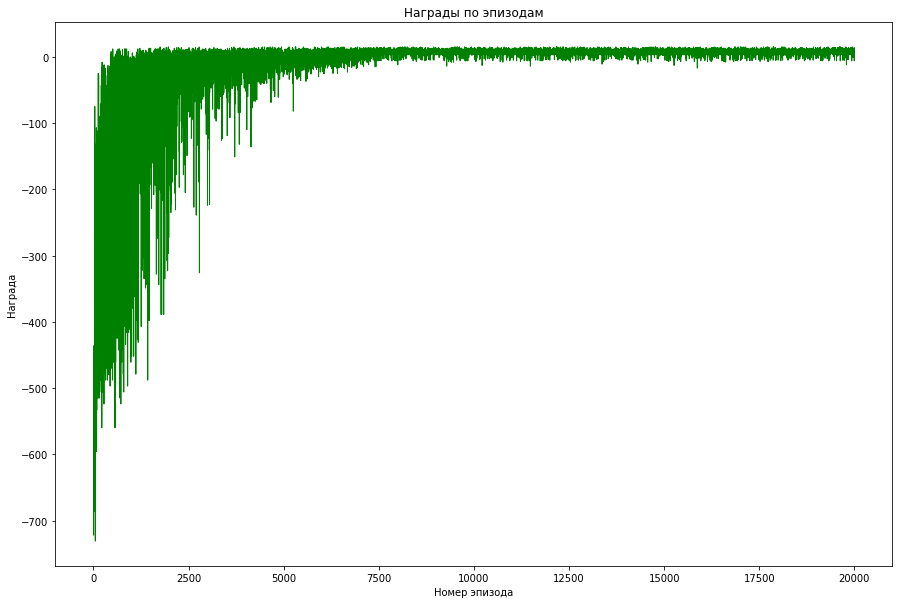

100%|██████████| 20000/20000 [00:13<00:00, 1532.89it/s]


Вывод Q-матрицы для алгоритма  Q-обучение
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 4.8024325   6.35364669  4.73371028  6.63704089  8.36234335 -2.71378503]
 [10.00698688 11.18677575  8.14196808 11.69098395 13.27445578  2.26832846]
 ...
 [ 1.20710242 14.44289526  2.03954084  5.61452036 -1.97494674 -4.0030572 ]
 [-1.92409269 -2.63824808 -1.94848282  8.60803378 -8.81464523 -5.851853  ]
 [ 4.45414282  4.55138058  2.81006256 18.59279808  1.20735118  1.1004574 ]]


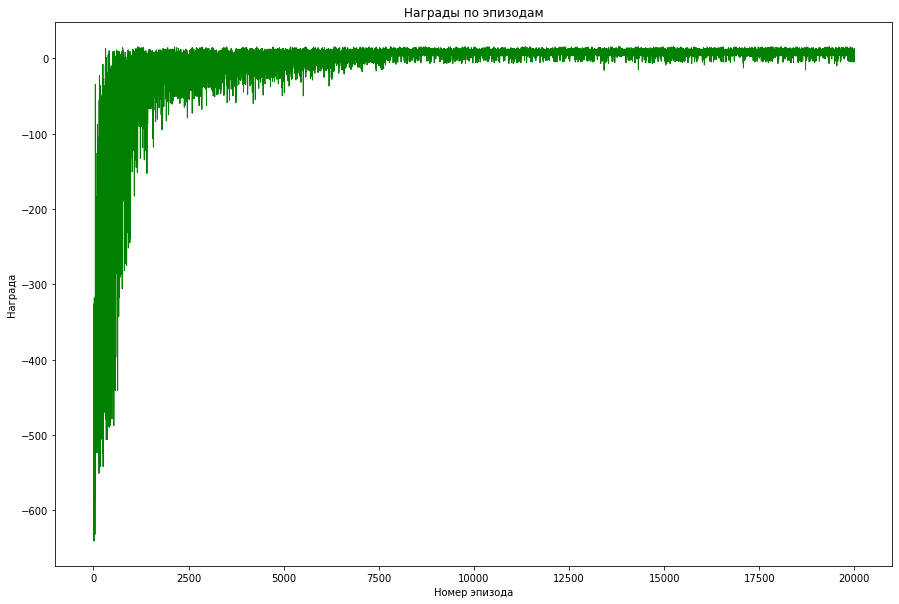

100%|██████████| 20000/20000 [00:13<00:00, 1461.21it/s]


Вывод Q-матриц для алгоритма  Двойное Q-обучение
Q1
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 1.79218734  2.73411888 -3.08109102  0.13353315  8.36234335 -7.0504721 ]
 [ 6.20090744  9.23165115  5.21301571  7.08989738 13.27445578 -1.86785723]
 ...
 [ 4.09046697 14.5657712  10.03399737  6.52675244  1.0641318  -0.30648755]
 [-4.9976029  -0.69897996 -5.30499981 -3.98462557 -7.09470212 -6.80871953]
 [ 3.31516825  2.20149365 -0.1098     17.72692164  0.09506207 -1.0098    ]]
Q2
[[ 0.          0.          0.          0.          0.          0.        ]
 [-0.27529344  2.47793597 -2.73211977  1.95214886  8.36234335 -5.85747712]
 [ 5.64129164  8.67966009  5.63800951  8.72802985 13.27445578 -1.50602474]
 ...
 [ 9.52718793 14.5657712  10.68291396  8.06913396  0.77736066 -0.41095051]
 [-5.07507386  1.9112409  -4.93493691 -4.75475202 -8.20656664 -7.45259751]
 [ 2.61803851  2.43516159  6.9331643  18.42293135 -0.59906639 -1.55725234]]


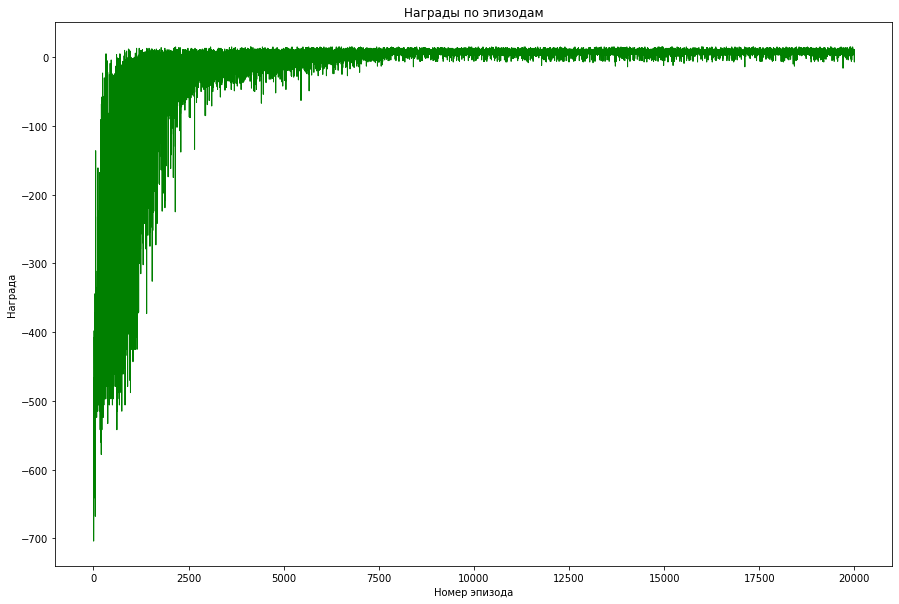

: 

In [11]:
main()
